[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


🚀 PROJET SPAM DETECTION - PRÉTRAITEMENT & FEATURE ENGINEERING

📂 1. CHARGEMENT DES DONNÉES NETTOYÉES
------------------------------------------------------------
✅ Données chargées : 5572 messages
✅ Colonnes : ['label', 'message']

📊 Aperçu des données :
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

📈 Distribution des classes :
label
ham     4825
spam     747
Name: count, dtype: int64
Ratio spam : 13.41%

🎯 2. ENCODAGE DES LABELS
------------------------------------------------------------
Mapping des labels :
  ham -> 0
  spam -> 1

✅ Labels encodés. Exemple :
  label  label_encoded
0   ham              0
1   ham              0
2  spam              1
3   ham              0
4   ham 

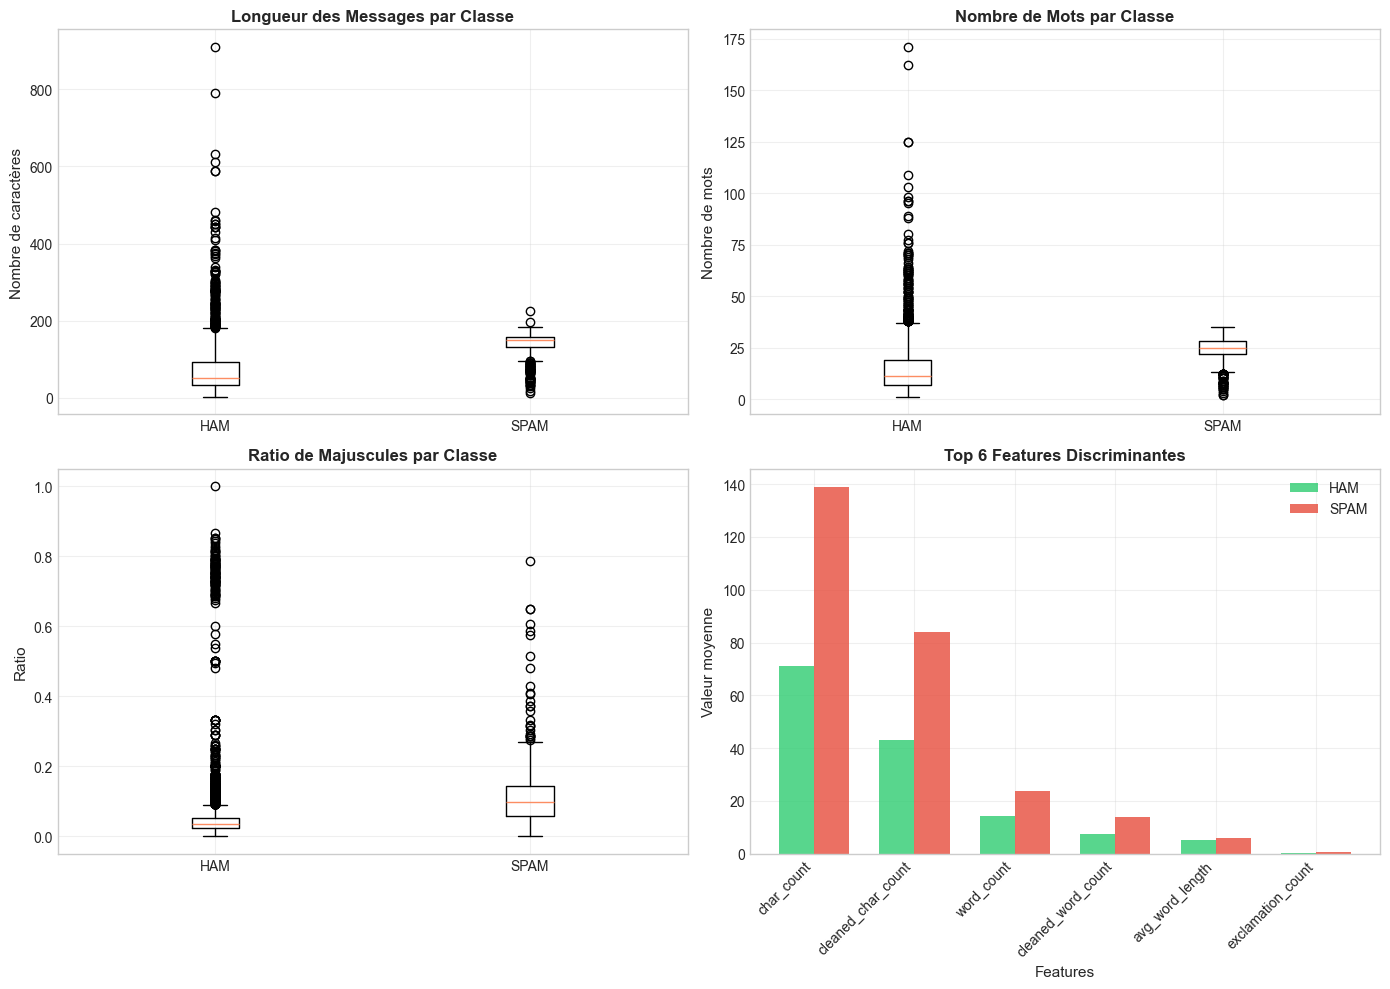


✅ PRÉTRAITEMENT TERMINÉ - RÉSUMÉ

📊 STATISTIQUES DU PRÉTRAITEMENT :
   • Messages originaux  : 5572
   • Messages nettoyés  : 5563
   • Réduction texte    : 39.2%

🔧 FEATURES CRÉÉES :
   • Features textuelles (TF-IDF) : 1000
   • Features numériques          : 16
   • Features booléennes          : 8
   • Total features               : 1016

📁 SPLIT DES DONNÉES :
   • Train set : 4457 échantillons (80.0%)
   • Test set  : 1115 échantillons (20.0%)
   • Stratification : ✅ préservée

🎯 INSIGHTS CLÉS :
   • Les spams sont plus longs (+96%)
   • Les spams utilisent plus de majuscules
   • Mots discriminants identifiés

📁 FICHIERS GÉNÉRÉS :
   • data/spam_preprocessed.csv
   • data/processed_data.joblib
   • models/tfidf_vectorizer.joblib
   • models/count_vectorizer.joblib
   • models/label_encoder.joblib
   • reports/feature_analysis.png

🚀 PROCHAINE ÉTAPE : Entraînement des Modèles de Machine Learning


In [ ]:
# 📧 SPAM DETECTION - Prétraitement et Feature Engineering
# Niveau MLOps 0 - Approche Manuelle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Télécharger les ressources NLTK (à exécuter une seule fois)
try:
    nltk.data.find('corpora/stopwords')
except:
    nltk.download('stopwords')
    nltk.download('wordnet')
    nltk.download('punkt')

# Configuration des graphiques
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

print("="*60)
print("🚀 PROJET SPAM DETECTION - PRÉTRAITEMENT & FEATURE ENGINEERING")
print("="*60)

# ============================================
# 1. CHARGEMENT DES DONNÉES NETTOYÉES
# ============================================

print("\n📂 1. CHARGEMENT DES DONNÉES NETTOYÉES")
print("-"*60)

# Charger les données nettoyées de l'étape précédente
df = pd.read_csv('../data/spam_clean.csv')
print(f"✅ Données chargées : {len(df)} messages")
print(f"✅ Colonnes : {list(df.columns)}")

# Aperçu
print("\n📊 Aperçu des données :")
print(df.head())

# Vérifier la distribution
print("\n📈 Distribution des classes :")
print(df['label'].value_counts())
print(f"Ratio spam : {df['label'].value_counts(normalize=True)['spam']*100:.2f}%")

# ============================================
# 2. ENCODAGE DES LABELS
# ============================================

print("\n🎯 2. ENCODAGE DES LABELS")
print("-"*60)

# Encoder les labels (ham -> 0, spam -> 1)
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

print("Mapping des labels :")
for original, encoded in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"  {original} -> {encoded}")

print(f"\n✅ Labels encodés. Exemple :")
print(df[['label', 'label_encoded']].head())

# ============================================
# 3. PRÉTRAITEMENT DU TEXTE
# ============================================

print("\n🧹 3. PRÉTRAITEMENT DU TEXTE")
print("-"*60)

# Initialiser les outils de prétraitement
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Ajouter des stop words spécifiques aux SMS
sms_stop_words = {'u', 'ur', 'im', 'gt', 'lt', 'amp', 'll', 've', 'dont', 'cant', 'wont'}
stop_words.update(sms_stop_words)

def clean_text(text):
    """
    Nettoie et prétraite un texte SMS
    """
    # Convertir en minuscules
    text = text.lower()
    
    # Supprimer les URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # Supprimer les adresses email
    text = re.sub(r'\S+@\S+', '', text)
    
    # Supprimer les numéros de téléphone (formats communs)
    text = re.sub(r'[\+\(]?[1-9][0-9 .\-\(\)]{8,}[0-9]', '', text)
    
    # Supprimer la ponctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Supprimer les chiffres
    text = re.sub(r'\d+', '', text)
    
    # Supprimer les caractères spéciaux
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenization
    tokens = text.split()
    
    # Supprimer les stop words
    tokens = [word for word in tokens if word not in stop_words]
    
    # Stemming (optionnel, à comparer avec lemmatization)
    # tokens = [stemmer.stem(word) for word in tokens]
    
    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Rejoindre les tokens
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

# Appliquer le nettoyage
print("🧼 Nettoyage des messages en cours...")
df['message_cleaned'] = df['message'].apply(clean_text)

# Afficher des exemples avant/après
print("\n📝 EXEMPLES AVANT/APRÈS NETTOYAGE :")
sample_idx = df.sample(3, random_state=42).index

for idx in sample_idx:
    original = df.loc[idx, 'message']
    cleaned = df.loc[idx, 'message_cleaned']
    label = df.loc[idx, 'label']
    
    print(f"\n🔸 {label.upper()}:")
    print(f"   Original: {original[:100]}...")
    print(f"   Nettoyé: {cleaned[:100]}...")

# Statistiques de nettoyage
original_lengths = df['message'].apply(len)
cleaned_lengths = df['message_cleaned'].apply(len)

print(f"\n📊 Statistiques de nettoyage :")
print(f"  Longueur moyenne avant : {original_lengths.mean():.1f} caractères")
print(f"  Longueur moyenne après : {cleaned_lengths.mean():.1f} caractères")
print(f"  Réduction moyenne : {((1 - cleaned_lengths.mean()/original_lengths.mean())*100):.1f}%")

# ============================================
# 4. FEATURE ENGINEERING
# ============================================

print("\n🔧 4. FEATURE ENGINEERING")
print("-"*60)

# Features basées sur le texte original
df['char_count'] = df['message'].apply(len)
df['word_count'] = df['message'].apply(lambda x: len(x.split()))
df['avg_word_length'] = df['char_count'] / df['word_count'].replace(0, 1)

# Features basées sur le texte nettoyé
df['cleaned_char_count'] = df['message_cleaned'].apply(len)
df['cleaned_word_count'] = df['message_cleaned'].apply(lambda x: len(x.split()) if x else 0)
df['cleaned_avg_word_length'] = df['cleaned_char_count'] / df['cleaned_word_count'].replace(0, 1)

# Features booléennes pour mots suspects
spam_keywords = ['free', 'win', 'cash', 'prize', 'claim', 'urgent', 'offer', 
                 'congratulations', 'selected', 'award', 'bonus', 'guaranteed',
                 'click', 'call', 'now', 'limited', 'discount', 'save']

for keyword in spam_keywords[:8]:  # Prendre les 8 premiers pour ne pas trop surcharger
    df[f'contains_{keyword}'] = df['message'].str.lower().str.contains(keyword).astype(int)

# Features de densité de ponctuation
df['exclamation_count'] = df['message'].apply(lambda x: x.count('!'))
df['question_count'] = df['message'].apply(lambda x: x.count('?'))
df['upper_case_ratio'] = df['message'].apply(lambda x: sum(1 for c in x if c.isupper()) / len(x) if len(x) > 0 else 0)

# Afficher les nouvelles features
print(f"✅ {len(df.columns) - 4} nouvelles features créées !")
print(f"\n📋 Liste des features :")
for i, col in enumerate(df.columns.tolist(), 1):
    print(f"  {i:2d}. {col}")

# Statistiques des features par classe
print("\n📊 Statistiques des features par classe :")
numeric_features = ['char_count', 'word_count', 'avg_word_length', 
                   'cleaned_char_count', 'cleaned_word_count',
                   'exclamation_count', 'question_count', 'upper_case_ratio']

stats_by_class = df.groupby('label')[numeric_features].mean()
print(stats_by_class.round(2))

# ============================================
# 5. VECTORISATION DU TEXTE
# ============================================

print("\n📚 5. VECTORISATION DU TEXTE")
print("-"*60)

# Option 1: Bag of Words (CountVectorizer)
print("\n🔸 Bag of Words (CountVectorizer):")
count_vectorizer = CountVectorizer(max_features=1000, ngram_range=(1, 2))
X_count = count_vectorizer.fit_transform(df['message_cleaned'])
print(f"  Matrice créée : {X_count.shape[0]} documents, {X_count.shape[1]} features")
print(f"  Exemple de mots features : {count_vectorizer.get_feature_names_out()[:10]}")

# Option 2: TF-IDF (recommandé)
print("\n🔸 TF-IDF Vectorizer:")
tfidf_vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2),
                                   min_df=2, max_df=0.95)
X_tfidf = tfidf_vectorizer.fit_transform(df['message_cleaned'])
print(f"  Matrice créée : {X_tfidf.shape[0]} documents, {X_tfidf.shape[1]} features")

# Afficher les mots avec les plus hauts scores TF-IDF
tfidf_scores = np.array(X_tfidf.mean(axis=0)).flatten()
feature_names = tfidf_vectorizer.get_feature_names_out()
top_indices = tfidf_scores.argsort()[-10:][::-1]

print("\n🔝 Top 10 mots par score TF-IDF moyen:")
for idx in top_indices:
    print(f"  {feature_names[idx]:15s} : {tfidf_scores[idx]:.4f}")

# ============================================
# 6. SPLIT DES DONNÉES
# ============================================

print("\n✂️  6. SPLIT DES DONNÉES (TRAIN/TEST)")
print("-"*60)

# Préparer les features
# Combiner features textuelles (TF-IDF) et features numériques
from scipy.sparse import hstack

# Features numériques
numeric_features_df = df[numeric_features + [f'contains_{k}' for k in spam_keywords[:8]]]
X_numeric = numeric_features_df.values

# Combiner avec TF-IDF
X_combined = hstack([X_tfidf, X_numeric])

# Labels
y = df['label_encoded'].values

# Split stratifié (pour garder la même proportion de spam dans train et test)
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X_combined, y, df.index, test_size=0.2, random_state=42, stratify=y
)

print(f"✅ Split terminé :")
print(f"  Train set : {X_train.shape[0]} échantillons ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"  Test set  : {X_test.shape[0]} échantillons ({X_test.shape[0]/len(df)*100:.1f}%)")

# Vérifier la distribution des classes dans chaque set
train_spam_ratio = y_train.mean() * 100
test_spam_ratio = y_test.mean() * 100

print(f"\n📊 Distribution des classes :")
print(f"  Train set : {train_spam_ratio:.2f}% spam")
print(f"  Test set  : {test_spam_ratio:.2f}% spam")
print(f"  Original  : {df['label_encoded'].mean()*100:.2f}% spam")

print("\n✅ Stratification préservée !")

# ============================================
# 7. SAUVEGARDE DES DONNÉES PRÉTRAITÉES
# ============================================

print("\n💾 7. SAUVEGARDE DES DONNÉES PRÉTRAITÉES")
print("-"*60)

# Sauvegarder le dataframe complet avec les nouvelles features
df.to_csv('../data/spam_preprocessed.csv', index=False)
print("✅ Données prétraitées sauvegardées : data/spam_preprocessed.csv")

# Sauvegarder les datasets splités
import joblib

data_to_save = {
    'X_train': X_train,
    'X_test': X_test,
    'y_train': y_train,
    'y_test': y_test,
    'feature_names': list(feature_names) + numeric_features_df.columns.tolist(),
    'vectorizer': tfidf_vectorizer,
    'label_encoder': label_encoder
}

joblib.dump(data_to_save, '../data/processed_data.joblib')
print("✅ Données splitées sauvegardées : data/processed_data.joblib")

# Sauvegarder les vectorizers séparément
joblib.dump(tfidf_vectorizer, '../models/tfidf_vectorizer.joblib')
joblib.dump(count_vectorizer, '../models/count_vectorizer.joblib')
joblib.dump(label_encoder, '../models/label_encoder.joblib')
print("✅ Modèles sauvegardés dans le dossier models/")

# ============================================
# 8. ANALYSE ET VISUALISATION DES FEATURES
# ============================================

print("\n📊 8. ANALYSE DES FEATURES IMPORTANTES")
print("-"*60)

# Créer un dataframe pour l'analyse
feature_df = pd.DataFrame({
    'feature': numeric_features_df.columns.tolist(),
    'spam_mean': numeric_features_df[df['label'] == 'spam'].mean().values,
    'ham_mean': numeric_features_df[df['label'] == 'ham'].mean().values,
})

# Calculer la différence
feature_df['difference'] = feature_df['spam_mean'] - feature_df['ham_mean']
feature_df['abs_difference'] = abs(feature_df['difference'])
feature_df = feature_df.sort_values('abs_difference', ascending=False)

print("\n🔝 Top 10 features les plus discriminantes :")
print(feature_df.head(10).round(3))

# Visualisation
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Longueur des messages
axes[0, 0].boxplot([df[df['label']=='ham']['char_count'], 
                    df[df['label']=='spam']['char_count']], 
                   labels=['HAM', 'SPAM'])
axes[0, 0].set_title('Longueur des Messages par Classe', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Nombre de caractères', fontsize=11)
axes[0, 0].grid(alpha=0.3)

# 2. Nombre de mots
axes[0, 1].boxplot([df[df['label']=='ham']['word_count'], 
                    df[df['label']=='spam']['word_count']], 
                   labels=['HAM', 'SPAM'])
axes[0, 1].set_title('Nombre de Mots par Classe', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Nombre de mots', fontsize=11)
axes[0, 1].grid(alpha=0.3)

# 3. Ratio de majuscules
axes[1, 0].boxplot([df[df['label']=='ham']['upper_case_ratio'], 
                    df[df['label']=='spam']['upper_case_ratio']], 
                   labels=['HAM', 'SPAM'])
axes[1, 0].set_title('Ratio de Majuscules par Classe', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Ratio', fontsize=11)
axes[1, 0].grid(alpha=0.3)

# 4. Top features discriminantes
top_features = feature_df.head(6)
x = np.arange(len(top_features))
width = 0.35

axes[1, 1].bar(x - width/2, top_features['ham_mean'], width, label='HAM', alpha=0.8, color='#2ecc71')
axes[1, 1].bar(x + width/2, top_features['spam_mean'], width, label='SPAM', alpha=0.8, color='#e74c3c')
axes[1, 1].set_title('Top 6 Features Discriminantes', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Features', fontsize=11)
axes[1, 1].set_ylabel('Valeur moyenne', fontsize=11)
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(top_features['feature'], rotation=45, ha='right')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/feature_analysis.png', dpi=300, bbox_inches='tight')
print("\n💾 Graphique sauvegardé : reports/feature_analysis.png")
plt.show()

# ============================================
# 9. RÉSUMÉ FINAL
# ============================================

print("\n" + "="*60)
print("✅ PRÉTRAITEMENT TERMINÉ - RÉSUMÉ")
print("="*60)

print(f"""
📊 STATISTIQUES DU PRÉTRAITEMENT :
   • Messages originaux  : {len(df)}
   • Messages nettoyés  : {len(df[df['message_cleaned'].str.strip() != ''])}
   • Réduction texte    : {((1 - cleaned_lengths.mean()/original_lengths.mean())*100):.1f}%
   
🔧 FEATURES CRÉÉES :
   • Features textuelles (TF-IDF) : {X_tfidf.shape[1]}
   • Features numériques          : {len(numeric_features_df.columns)}
   • Features booléennes          : 8
   • Total features               : {X_combined.shape[1]}
   
📁 SPLIT DES DONNÉES :
   • Train set : {X_train.shape[0]} échantillons ({X_train.shape[0]/len(df)*100:.1f}%)
   • Test set  : {X_test.shape[0]} échantillons ({X_test.shape[0]/len(df)*100:.1f}%)
   • Stratification : ✅ préservée
   
🎯 INSIGHTS CLÉS :
   • Les spams sont plus longs (+{((df[df['label']=='spam']['char_count'].mean()/df[df['label']=='ham']['char_count'].mean() - 1)*100):.0f}%)
   • Les spams utilisent plus de majuscules
   • Mots discriminants identifiés
   
📁 FICHIERS GÉNÉRÉS :
   • data/spam_preprocessed.csv
   • data/processed_data.joblib
   • models/tfidf_vectorizer.joblib
   • models/count_vectorizer.joblib
   • models/label_encoder.joblib
   • reports/feature_analysis.png
""")

print("="*60)
print("🚀 PROCHAINE ÉTAPE : Entraînement des Modèles de Machine Learning")
print("="*60)